# Top K, Top P, Temperature

Notebook to test top_k, top_p, and temperature.

Information retrieved from DeepLearning.ai's Undersatnding and Applying Text Embeddings course's [Text Generation with Vertex AI](https://learn.deeplearning.ai/google-cloud-vertex-ai/lesson/6/text-generation-with-vertex-ai) lesson.

In [37]:
import os
from dotenv import load_dotenv
import vertexai
from vertexai.language_models import TextGenerationModel

load_dotenv()

PROJECT_ID = os.environ.get('GOOGLE_CLOUD_PROJECT')
REGION = 'us-central1'

vertexai.init(project = PROJECT_ID, location = REGION)
model = TextGenerationModel.from_pretrained("text-bison@001")

## Decoding Strategies

We'll use this example:

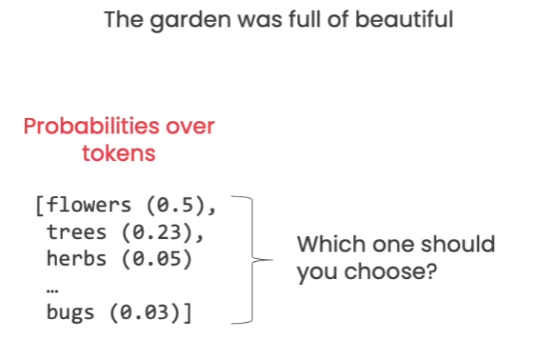

## Temperature

Temperature controls the randomness. Lower values are more deterministic. Higher values are more creative.

Charting the probabilities:

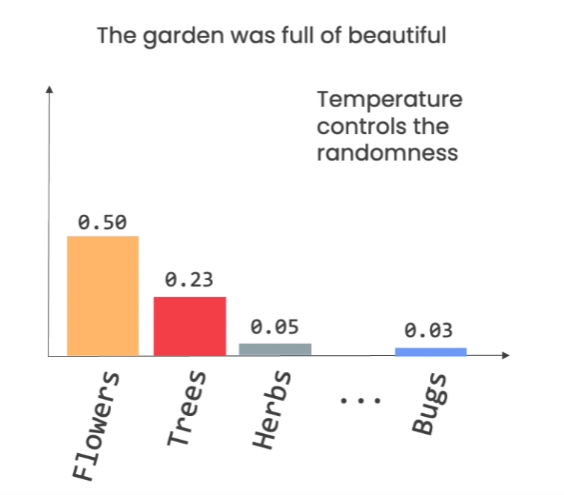

Temperature of 0 will be deterministic and most probable token is selected:

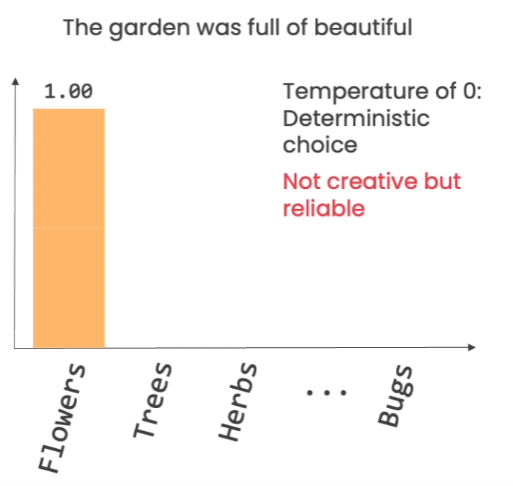

Increasing the temperature will flatten the probability distribution and inreasing the likelihood of selecting a less probable token:

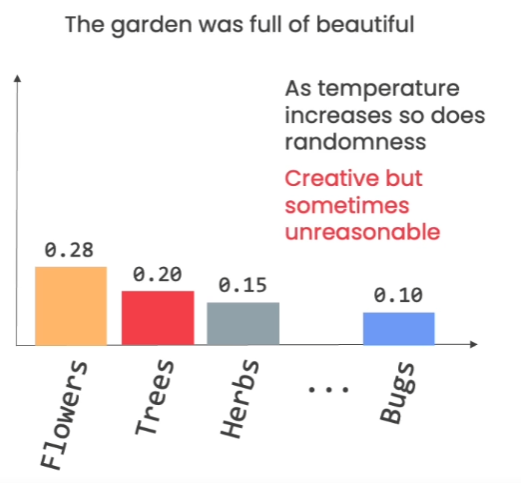

Summary:

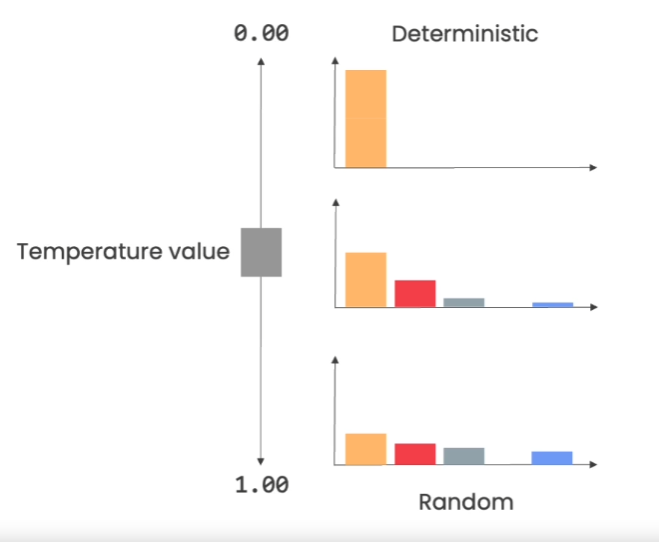

In [38]:
def generate_text(temperature):
    return model.predict(
        "Complete the sentence: As I prepared the picture frame, I reached into my toolkip to fetch my:",
        temperature=temperature).text

In [39]:
# Temperature of 0, so the generated text is always the same

print(print(generate_text(0)))

As I prepared the picture frame, I reached into my toolkip to fetch my hammer.
None


In [40]:
# Temperature of 1 is more random

print(generate_text(1))

The sentence is missing a word. The word needs to be a tool used for cutting. One possibility is a saw. The sentence can be completed as follows:
As I prepared the picture frame, I reached into my tool kit to fetch my saw.


## Top K

Sample from a short list of top k tokens. If k is 2, then it will sample from flowers and trees:

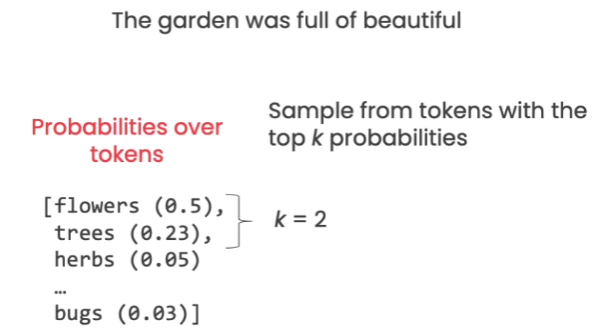

Top K doesn't work well when you have a probability distribution that's very skewed (e.g. if you have one word that's very likely and the rest are very unlikely). The problem with Top K is that it's hard coded and it doesn't dynamically adapt to the number of tokens.

## Top P

A strategy where we can dynamically set the number of tokens to sample from. For example, sample from minimum set of tokens whose cumulative probability is greater or equal to P. If P is 0.75, then flowers, trees, and herbs will be sampled from:

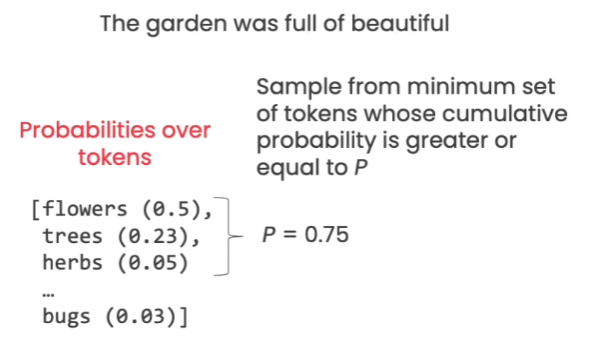

## Decoding Strategy Priority

In Vertex AI, top_k is applied first, then top_p, then temperature. Temperature of 0 is deterministic in Vertex AI, so if we want to play with top_k or top_p, set temperature to a high value like 0.9.

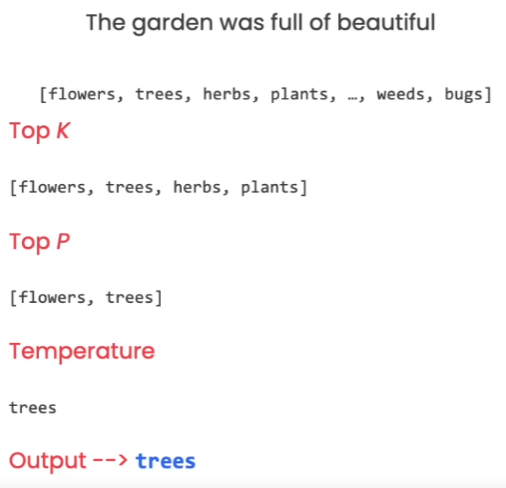

In [49]:
def generate_text2(temperature, top_p):
    return model.predict(
        "Write an advertisement for jackets that involes blue elephants and avocados.",
        temperature=temperature,
        top_p=top_p).text

In [53]:
print(generate_text2(0.9, 0.2))

**Introducing the new Blue Elephant Avocado Jacket!**

This jacket is the perfect way to show your love of both blue elephants and avocados. It's made of soft, durable fabric and features a fun, whimsical design. The front of the jacket features a large blue elephant with an avocado in its trunk, and the back features a repeating pattern of avocados.

The Blue Elephant Avocado Jacket is perfect for any occasion. Wear it to a casual day out, a night on the town, or even to work. It's sure to turn heads wherever you go.

**Order your Blue Elephant Avocado Jacket today!
